## Ensemble
앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만든다.
우리가 알아볼 앙상블 모델은
<ul>
<li>랜덤 포레스트(Random Forest)</li>
<li>에이다부스트(AdaBoost)</li>
<li>그래디언트 부스팅(Gradient Boosting)</li>

In [5]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
#import graphviz
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown OS')

In [6]:
# Random Forest using Breast Cancer data
# 데이터가 편중되어 있음. 1:3 비율 정도로
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()

# stratify option은 분류 클래스(레이블)에 따라서 샘플의 갯수를 balance해주는건데. 여기선 omit.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 나무의 갯수만 지정해줌.
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Train set performance: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set performance: {:.3f}".format(forest.score(X_test, y_test)))

Train set performance: 1.000
Test set performance: 0.972


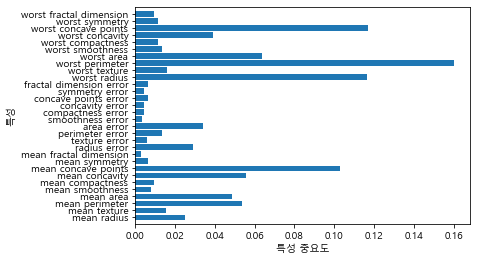

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)